In [268]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



In [269]:
df=pd.read_csv('data/train_global_preprocessed.csv')

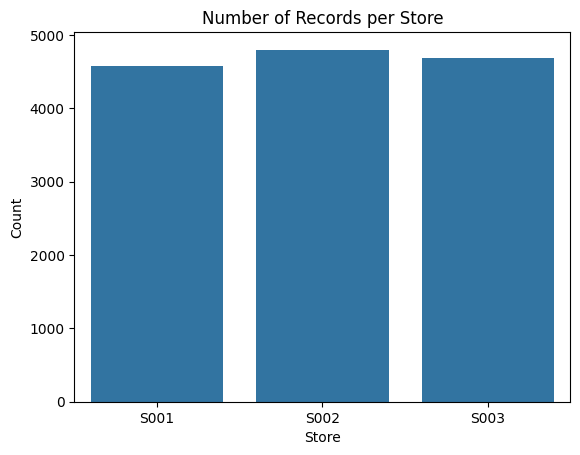

In [270]:
sns.countplot(data=df, x='StoreID')
plt.title('Number of Records per Store')
plt.xlabel('Store')
plt.ylabel('Count')
plt.show()

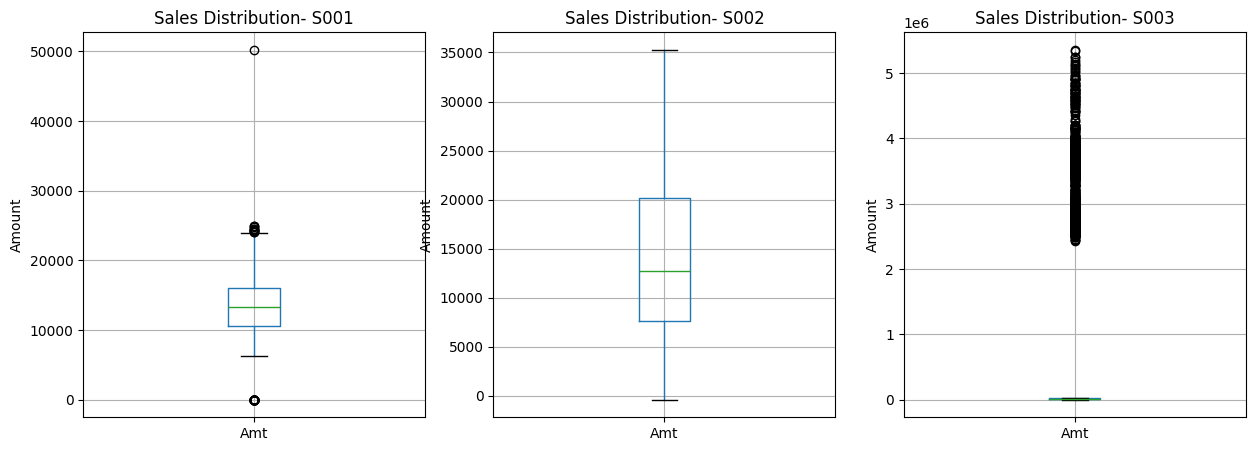

In [271]:
stores = df['StoreID'].unique()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, store in enumerate(stores):
    df[df['StoreID'] == store].boxplot(column='Amt', ax=axes[i])
    axes[i].set_title(f'Sales Distribution- {store}')
    axes[i].set_ylabel('Amount')

plt.show()

In [272]:
df.groupby('StoreID')['Amt'].describe()


,count,mean,std,min,25%,50%,75%,max
StoreID,,,,,,,,
S001,4580.0,13695.638100,4.231515e+03,0.0,10615.0,13350.0,15982.125,50235.0
S002,4800.0,13934.862917,8.042973e+03,-400.0,7650.0,12750.0,20152.500,35275.0
S003,4686.0,638601.914959,1.338539e+06,0.0,8370.0,12975.0,28135.000,5355000.0


In [273]:
df[df['Amt'] < 0]

,Day_Count,Day,StoreID,ProductName,Product_Calorie,Promo_applied,specials,mods,Amt,weather,Inflation_Percentage,Unemployment_Percentage
3444,210,Monday,S002,Cheese Burger,800,0,0,0,-400.0,humid,2.2,3.2


In [274]:
df=df[df['Amt']>=0]

In [275]:
df.groupby('StoreID')['Amt'].describe()


,count,mean,std,min,25%,50%,75%,max
StoreID,,,,,,,,
S001,4580.0,13695.638100,4.231515e+03,0.0,10615.0,13350.0,15982.125,50235.0
S002,4799.0,13937.849969,8.041148e+03,0.0,7650.0,12750.0,20160.000,35275.0
S003,4686.0,638601.914959,1.338539e+06,0.0,8370.0,12975.0,28135.000,5355000.0


In [276]:
s3=df['StoreID'] == 'S003'
upper = df.loc[s3, 'Amt'].quantile(0.97)
upper

np.float64(3910000.0)

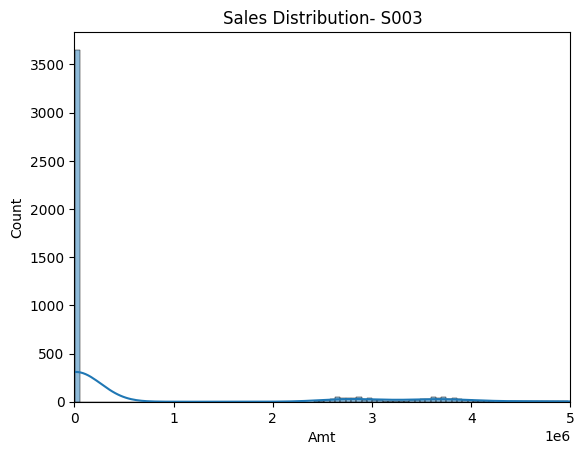

In [277]:

sns.histplot(df[(df['StoreID'] == 'S003') & (df['Amt'] > 0)]['Amt'], bins=100, kde=True)
plt.title("Sales Distribution- S003")
plt.xlim(0, 5000000)  
plt.show()


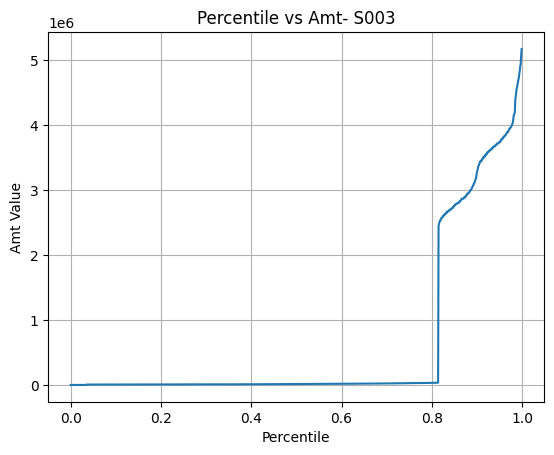

In [278]:
store_s3 = df[df['StoreID'] == 'S003']['Amt']
percentiles = np.arange(0.0, 1.00, 0.001)  
values = [store_s3.quantile(p) for p in percentiles]

plt.plot(percentiles, values)
plt.xlabel("Percentile")
plt.ylabel("Amt Value")
plt.title("Percentile vs Amt- S003")
plt.grid(True)
plt.show()

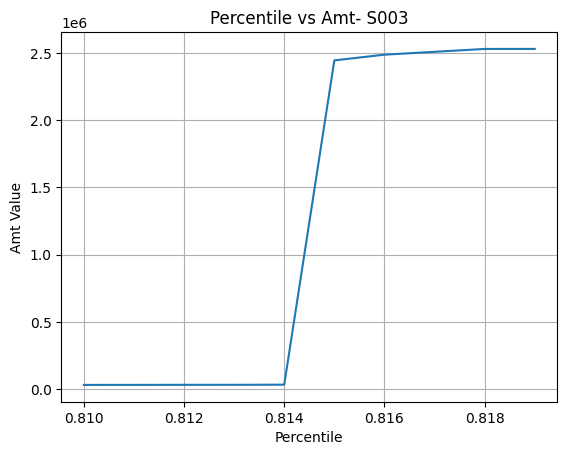

In [279]:
store_s3 = df[df['StoreID'] == 'S003']['Amt']
percentiles = np.arange(0.81, 0.82, 0.001)  
values = [store_s3.quantile(p) for p in percentiles]

plt.plot(percentiles, values)
plt.xlabel("Percentile")
plt.ylabel("Amt Value")
plt.title("Percentile vs Amt- S003")
plt.grid(True)
plt.show()

In [280]:
s3=df['StoreID'] == 'S003'
upper = df.loc[s3, 'Amt'].quantile(0.814)
df.loc[s3, 'Amt'] = df.loc[s3, 'Amt'].clip(upper=upper)

In [281]:
df.groupby('StoreID')['Amt'].describe()


,count,mean,std,min,25%,50%,75%,max
StoreID,,,,,,,,
S001,4580.0,13695.638100,4231.515485,0.0,10615.0,13350.0,15982.125,50235.00
S002,4799.0,13937.849969,8041.147822,0.0,7650.0,12750.0,20160.000,35275.00
S003,4686.0,17123.825075,10718.339845,0.0,8370.0,12975.0,28135.000,34050.15


In [282]:
df[(df['Amt'] > upper) & (df['StoreID'] == 'S003')]

,Day_Count,Day,StoreID,ProductName,Product_Calorie,Promo_applied,specials,mods,Amt,weather,Inflation_Percentage,Unemployment_Percentage


In [283]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'browser'

daily_sales = df.groupby(['Day_Count', 'Day'])['Amt'].sum().reset_index()


fig = px.line(daily_sales, x='Day_Count', y='Amt', title='Sales over Days',color='Day')
fig.show()


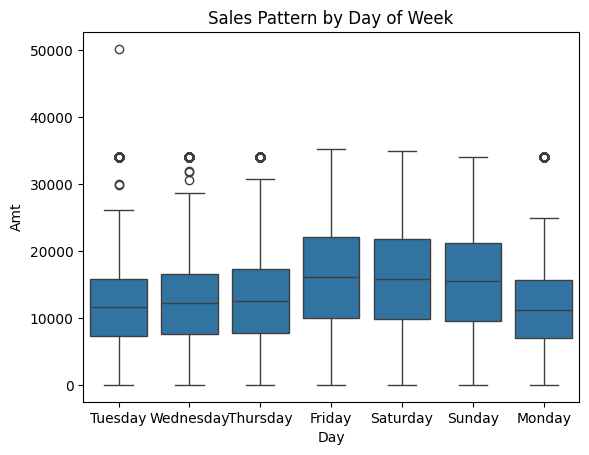

In [284]:

sns.boxplot(data=df, x='Day', y='Amt')
plt.title("Sales Pattern by Day of Week")
plt.show()

In [285]:
df[df['Amt']>40000]

,Day_Count,Day,StoreID,ProductName,Product_Calorie,Promo_applied,specials,mods,Amt,weather,Inflation_Percentage,Unemployment_Percentage
6417,400,Tuesday,S001,Coca-Cola,100,0,0,0,50235.0,very hot,3.2,1.7


In [286]:
df=df[df['Amt']<40000]

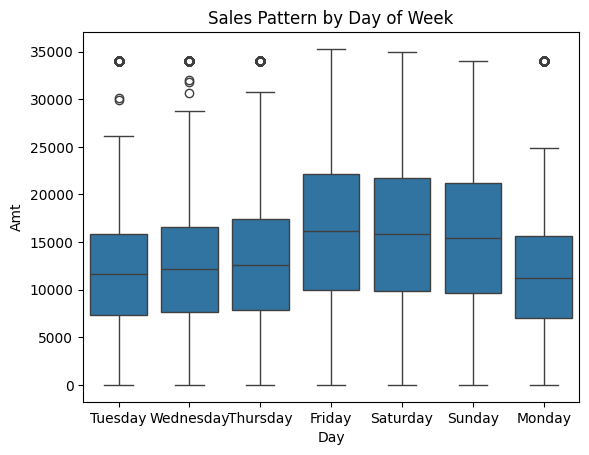

In [287]:

sns.boxplot(data=df, x='Day', y='Amt')
plt.title("Sales Pattern by Day of Week")
plt.show()

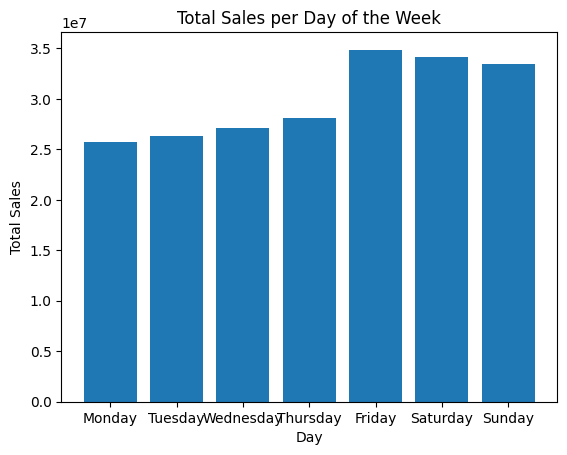

In [288]:
day_sales=df.groupby('Day')['Amt'].sum()
correct_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_sales = day_sales.reindex(correct_order)
plt.bar(day_sales.index, day_sales.values)
plt.title("Total Sales per Day of the Week")
plt.xlabel("Day")
plt.ylabel("Total Sales")
plt.show()


In [289]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'browser'

daily_sales = df.groupby(['Day_Count', 'StoreID'])['Amt'].sum().reset_index()


fig = px.line(daily_sales, x='Day_Count', y='Amt', title='Sales over Days',color='StoreID')
fig.show()


<Axes: xlabel='StoreID', ylabel='Day'>

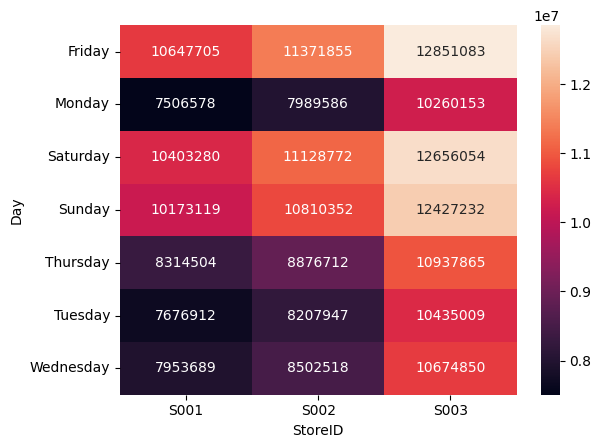

In [290]:
pivot_table = df.groupby(['Day', 'StoreID'])['Amt'].sum().reset_index()
pivot_table = pivot_table.pivot(index='Day', columns='StoreID', values='Amt')
sns.heatmap(pivot_table, annot=True, fmt='.0f')

product analysis

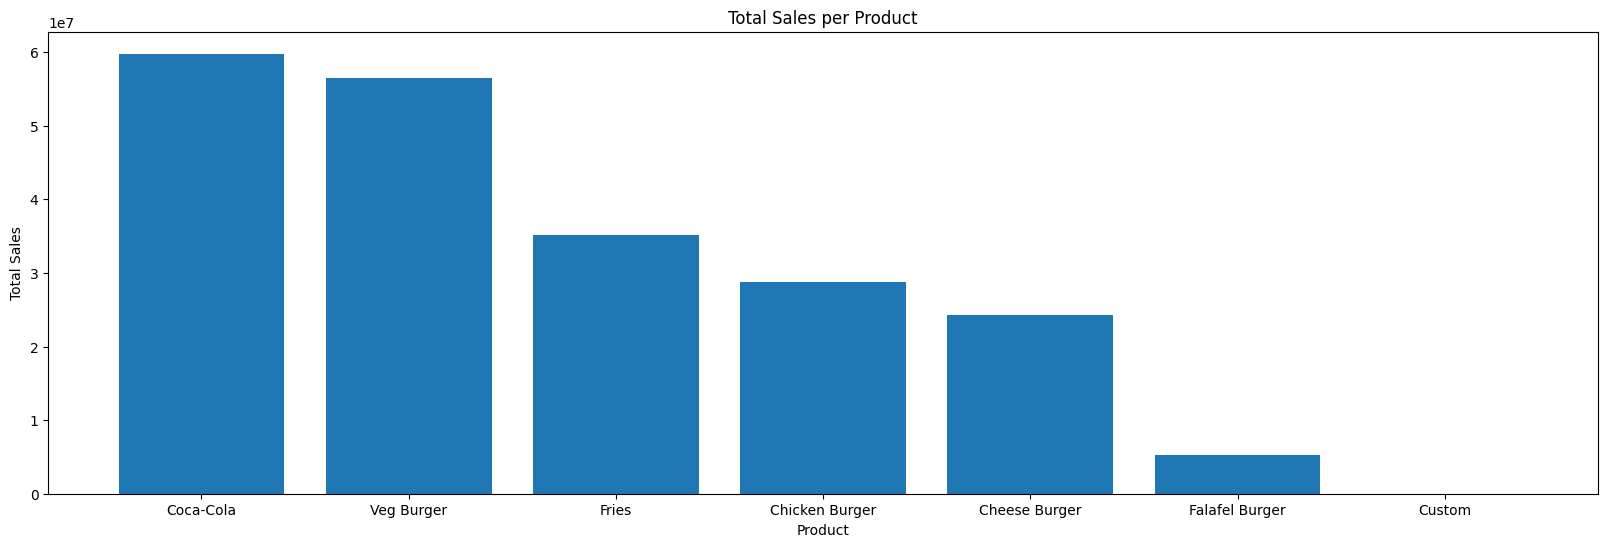

In [291]:
product_sales = df.groupby('ProductName')['Amt'].agg(['sum']).sort_values('sum', ascending=False)
plt.figure(figsize=(20, 6))
plt.bar(product_sales.index, product_sales['sum'])
plt.title("Total Sales per Product")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.show()

In [292]:
df[df['ProductName'] == 'Custom']['Amt'].describe()

count    511.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Amt, dtype: float64

<Figure size 1000x600 with 0 Axes>

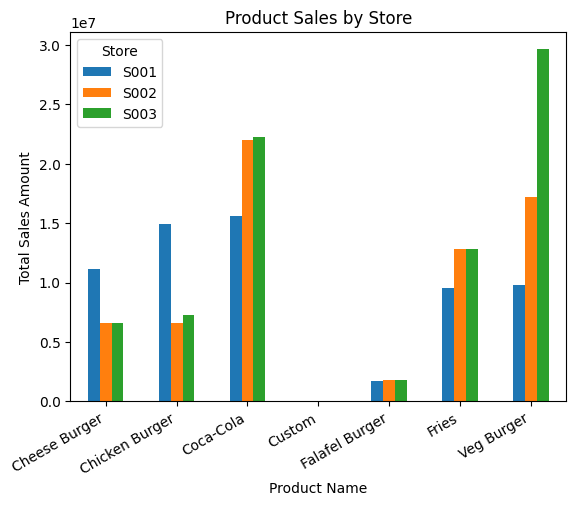

In [293]:
plt.figure(figsize=(10, 6))
product_store = df.groupby(['StoreID', 'ProductName'])['Amt'].sum().reset_index()
pivot = product_store.pivot(index='ProductName', columns='StoreID', values='Amt')
pivot.plot(kind='bar')
plt.title('Product Sales by Store')
plt.xlabel('Product Name')
plt.ylabel('Total Sales Amount')
plt.legend(title='Store')
plt.xticks(rotation=30, ha='right')
plt.show()

#more uniform demands in s1, s3 wins for sales just because of veg burger

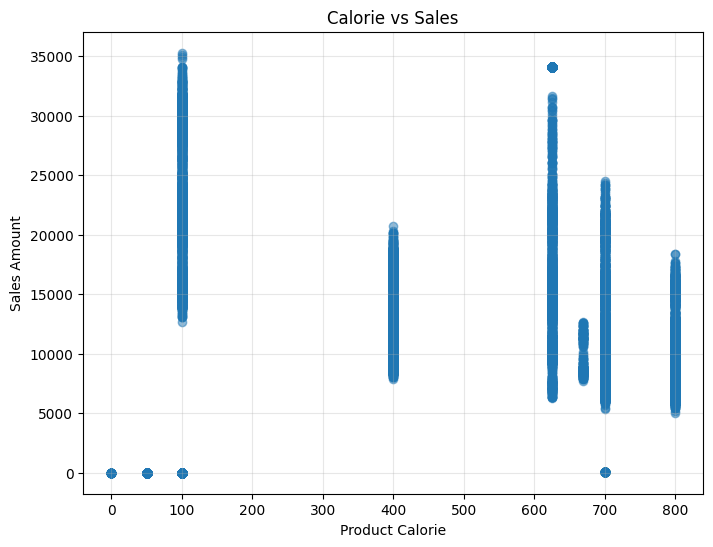

In [294]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Product_Calorie'], df['Amt'], alpha=0.5)
plt.xlabel('Product Calorie')
plt.ylabel('Sales Amount')
plt.title('Calorie vs Sales')
plt.grid(True, alpha=0.3)
plt.show()

In [295]:
df.groupby('ProductName')['Product_Calorie'].nunique()

ProductName
Cheese Burger     1
Chicken Burger    1
Coca-Cola         1
Custom            3
Falafel Burger    2
Fries             1
Veg Burger        1
Name: Product_Calorie, dtype: int64

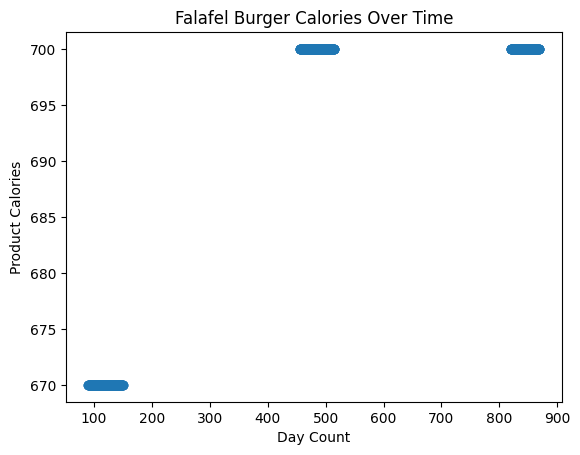

In [296]:
plt.scatter(df[df['ProductName'] == 'Falafel Burger']['Day_Count'], df[df['ProductName'] == 'Falafel Burger']['Product_Calorie'])
plt.xlabel('Day Count')
plt.ylabel('Product Calories')
plt.title('Falafel Burger Calories Over Time')
plt.show()

In [297]:
df = df.drop('Product_Calorie', axis=1)
df.columns

Index(['Day_Count', 'Day', 'StoreID', 'ProductName', 'Promo_applied',
       'specials', 'mods', 'Amt', 'weather', 'Inflation_Percentage',
       'Unemployment_Percentage'],
      dtype='object')

Text(0.5, 1.0, 'Feature Correlation Matrix')

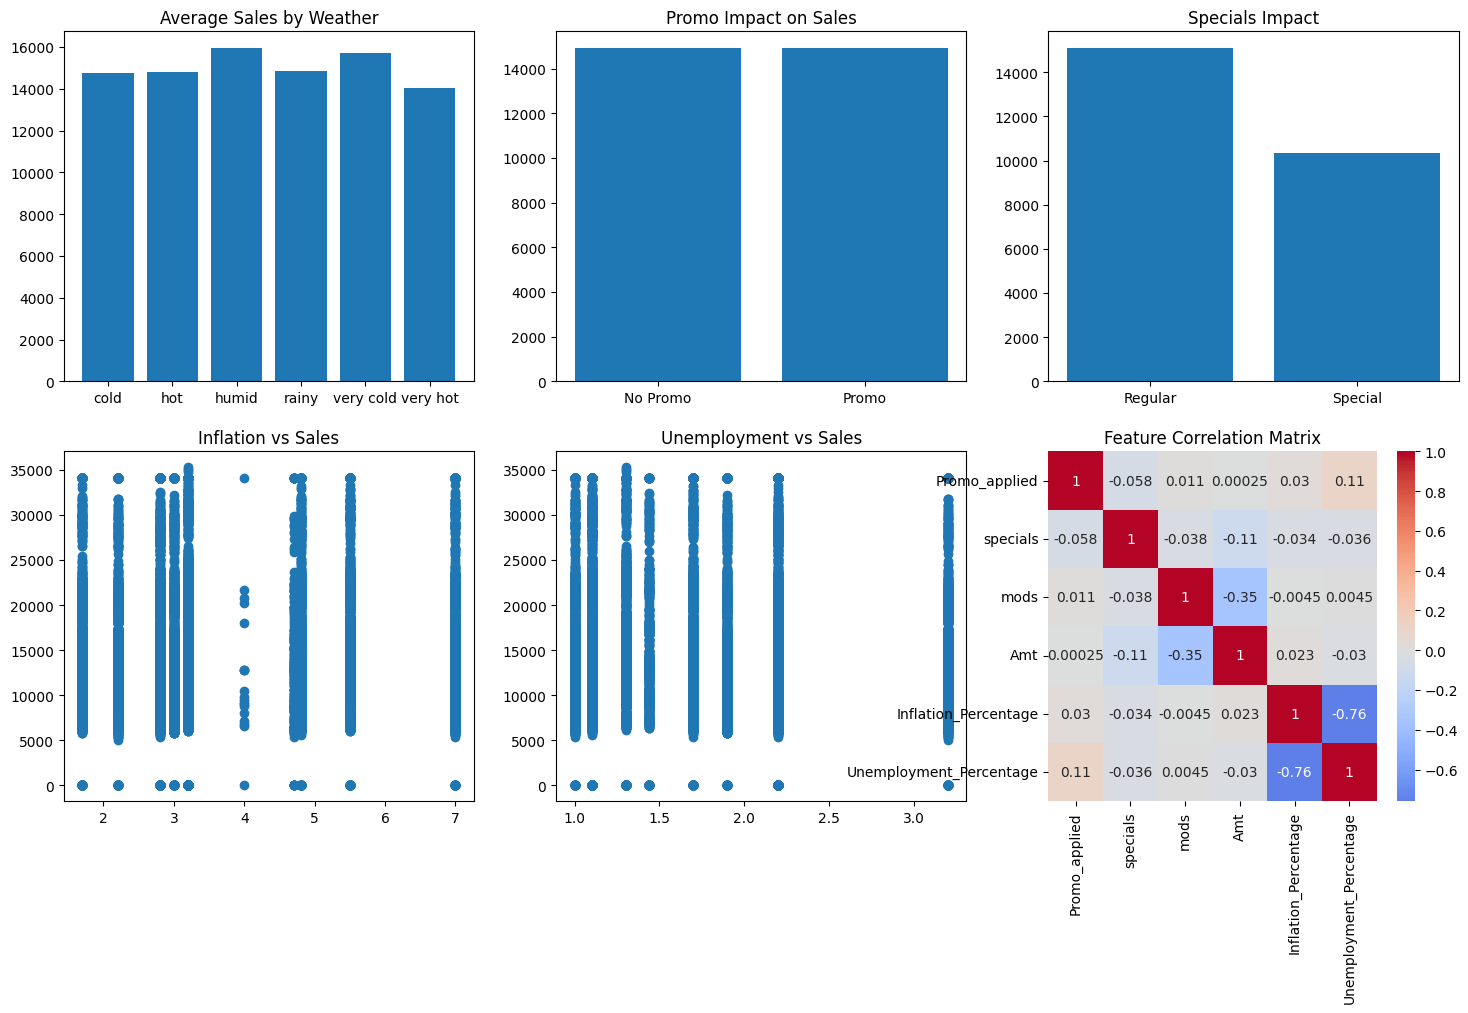

In [298]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Weather impact
weather_sales = df.groupby('weather')['Amt'].mean()
axes[0,0].bar(weather_sales.index, weather_sales.values)
axes[0,0].set_title('Average Sales by Weather')

# Promo impact
promo_sales = df.groupby('Promo_applied')['Amt'].mean()
axes[0,1].bar(['No Promo', 'Promo'], promo_sales.values)
axes[0,1].set_title('Promo Impact on Sales')

# Specials and mods impact
axes[0,2].bar(['Regular', 'Special'], df.groupby('specials')['Amt'].mean().values)
axes[0,2].set_title('Specials Impact')

# Inflation vs Sales
axes[1,0].scatter(df['Inflation_Percentage'], df['Amt'])
axes[1,0].set_title('Inflation vs Sales')

# Unemployment vs Sales
axes[1,1].scatter(df['Unemployment_Percentage'], df['Amt'])
axes[1,1].set_title('Unemployment vs Sales')

# Correlation heatmap
numeric_cols = ['Promo_applied', 'specials', 'mods', 
                'Amt', 'Inflation_Percentage', 'Unemployment_Percentage']
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,2])
axes[1,2].set_title('Feature Correlation Matrix')


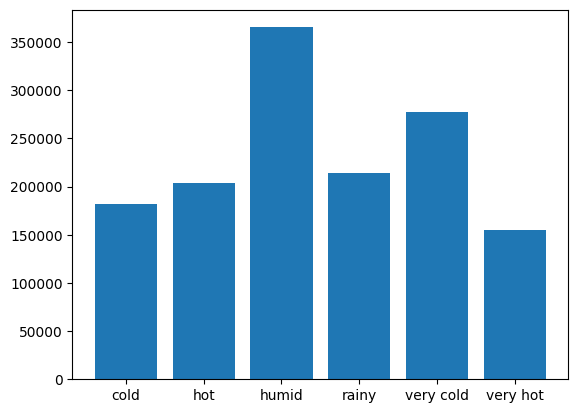

In [299]:
df_org=pd.read_csv('data/artificial_sales.csv')
weather_sales = df_org.groupby('weather')['Amt'].mean()
plt.bar(weather_sales.index, weather_sales.values)
plt.show()

Earlier we transformed the weather because it was inconsistent to make it consistent and now it shows no trend or pattern. Weather is an important factor to pred sales but here it seems there are lot of data entry errors and we can't use it.

In [300]:
df=df.drop('weather', axis=1)

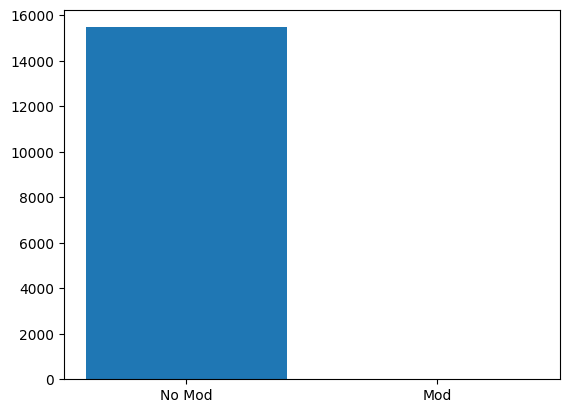

In [301]:
mod_sales = df.groupby('mods')['Amt'].mean()
plt.bar(['No Mod', 'Mod'], mod_sales.values)
plt.show()

In [302]:
df[df['mods']==1].shape

(507, 10)

In [303]:
df[df['ProductName']=='Custom'].shape

(511, 10)

In [304]:
df[df['ProductName']=='Custom']['mods'].sum() # all mods are custom/modification/instruction

np.int64(507)

In [305]:
df[(df['ProductName']!='Custom') & (df['Amt']==0)]

,Day_Count,Day,StoreID,ProductName,Promo_applied,specials,mods,Amt,Inflation_Percentage,Unemployment_Percentage


In [306]:
df=df.drop('mods', axis=1)

In [307]:
# df.drop('Inflation_Percentage', axis=1)

<Axes: xlabel='ProductName'>

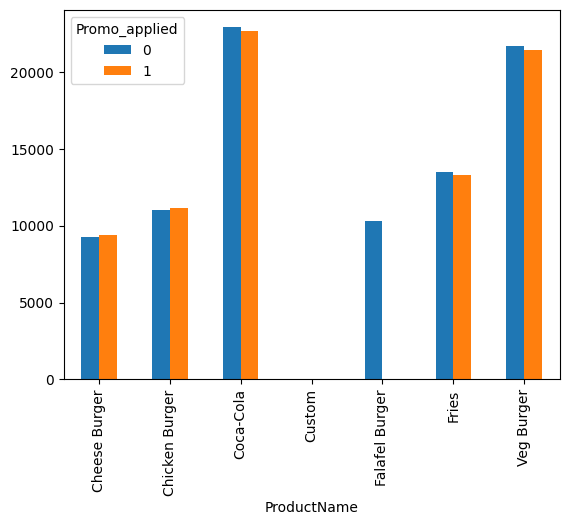

In [308]:
promo_data=df.groupby(['ProductName','Promo_applied'])['Amt'].mean().reset_index()
bar_plot = promo_data.pivot(index='ProductName', columns='Promo_applied', values='Amt')
bar_plot.plot(kind='bar')

In [309]:
df.drop('Promo_applied', axis=1, inplace=True)

In [310]:
df.head(5)

,Day_Count,Day,StoreID,ProductName,specials,Amt,Inflation_Percentage,Unemployment_Percentage
0,1,Tuesday,S001,Veg Burger,0,13125.0,4.7,1.7
1,1,Tuesday,S001,Fries,0,11250.0,4.7,1.7
2,1,Tuesday,S001,Coca-Cola,0,17680.0,4.7,1.7
3,1,Tuesday,S002,Cheese Burger,0,7800.0,4.7,1.7
4,1,Tuesday,S002,Fries,0,16275.0,4.7,1.7


In [311]:
df.to_csv('data/train_cleaned_data.csv', index=False)